In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# Read full dataset
train = pd.read_csv('/content/drive/Othercomputers/My Laptop/github-repositories/snfc-crowd-forecasting/data/train.csv')
test = pd.read_csv('/content/drive/Othercomputers/My Laptop/github-repositories/snfc-crowd-forecasting/data/test.csv')

In [3]:
# Re-train on full data, to upload to dashboard competition benchmark
train_on_full = False

In [4]:
if(train_on_full == True):
    data = [train, test]
    train = pd.concat(data)

    test = train

In [5]:
# Splitting of features

x_train = train.loc[:,'month':'p0q3']
y_train = train.p0q0

# Shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=0)

x_test = test.loc[:,'month':'p0q3']
y_test = test.p0q0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(21165, 11) (21165,)
(9952, 11) (9952,)


**Hypothesis #1, crowd factor depends only from the own train crowd factor**

In [6]:
x_train_sub = x_train[["p0q1","p0q2","p0q3"]]
x_test_sub =   x_test[["p0q1","p0q2","p0q3"]]

pipe = Pipeline([('scaler', StandardScaler()), ('regression', LinearRegression())])

pipe.fit(x_train_sub, y_train)

y_pred = pipe.predict(x_train_sub)
mae_train = mean_absolute_error(y_pred, y_train)

y_pred = pipe.predict(x_test_sub)
mae_test = mean_absolute_error(y_pred, y_test)


print("r2: ", pipe.score(x_test_sub, y_test))

print("mae train: ", mae_train)
print("mae test: ", mae_test)



r2:  0.8316535855495732
mae train:  0.042491554604965634
mae test:  0.04081407102278913


**Hypothesis #2, crowd factor depends only from previous trains crowd factor**

In [7]:

x_train_sub = x_train[["p1q0","p2q0","p3q0"]]
x_test_sub =   x_test[["p1q0","p2q0","p3q0"]]

pipe = Pipeline([('scaler', StandardScaler()), ('regression', LinearRegression())])

pipe.fit(x_train_sub, y_train)

y_pred = pipe.predict(x_train_sub)
mae_train = mean_absolute_error(y_pred, y_train)

y_pred = pipe.predict(x_test_sub)
mae_test = mean_absolute_error(y_pred, y_test)


print("r2: ", pipe.score(x_test_sub, y_test))

print("mae train: ", mae_train)
print("mae test: ", mae_test)

r2:  0.5404472958633791
mae train:  0.08693300848764711
mae test:  0.08091566714905823


**Hypothesis #3, crowd factor depends from all crowd factor features**

In [8]:
x_train_sub = x_train[["p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]
x_test_sub =   x_test[["p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]

pipe = Pipeline([('scaler', StandardScaler()), ('regression', LinearRegression())])

pipe.fit(x_train_sub, y_train)

y_pred = pipe.predict(x_train_sub)
mae_train = mean_absolute_error(y_pred, y_train)

y_pred = pipe.predict(x_test_sub)
mae_test = mean_absolute_error(y_pred, y_test)


print("r2: ", pipe.score(x_test_sub, y_test))

print("mae train: ", mae_train)
print("mae test: ", mae_test)

r2:  0.8585666026413814
mae train:  0.040055503360496354
mae test:  0.03782075832740947


**GRID SEARCH FOR RANDOM FOREST REGRESSOR**

In [ ]:
x_train_sub = x_train[["p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]
x_test_sub =   x_test[["p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]

pipe = Pipeline([('scaler', StandardScaler()), ('regression', RandomForestRegressor(random_state=1))])


param_grid = {
    "regression__n_estimators": [200, 250, 300],
    "regression__max_depth": [20,30,35, None],
}

search = GridSearchCV(pipe, param_grid, n_jobs=2, scoring='neg_mean_absolute_error',verbose=2,cv=3)
search.fit(x_train_sub, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regression',
                                        RandomForestRegressor(random_state=1))]),
             n_jobs=2,
             param_grid={'regression__max_depth': [20, 30, 35, None],
                         'regression__n_estimators': [200, 250, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
print(search.best_score_)
print(search.best_params_)

-0.015199350370296898
{'regression__max_depth': 35, 'regression__n_estimators': 200}


**Random Forest Regressor**

In [9]:
x_train_sub = x_train[["p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]
x_test_sub =   x_test[["p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]

pipe = Pipeline([('scaler', StandardScaler()), ('regression', RandomForestRegressor(n_estimators = 200,max_depth=35, random_state=1))])

pipe.fit(x_train_sub, y_train)

y_pred = pipe.predict(x_train_sub)
mae_train = mean_absolute_error(y_pred, y_train)

y_pred = pipe.predict(x_test_sub)
mae_test = mean_absolute_error(y_pred, y_test)


print("r2: ", pipe.score(x_test_sub, y_test))

print("mae train: ", mae_train)
print("mae test: ", mae_test)

r2:  0.9739784424250425
mae train:  0.00546133024218681
mae test:  0.014203808537749113


In [ ]:
# Max number of tree for max_depth=auto
max([estimator.get_depth() for estimator in pipe['regression'].estimators_])

39

In [ ]:
x_test_sub.columns

Index(['p1q0', 'p2q0', 'p3q0', 'p0q1', 'p0q2', 'p0q3'], dtype='object')

**FEATURE IMPORTANCE**

In [ ]:
from sklearn.inspection import permutation_importance
import time

forest = pipe['regression']

start_time = time.time()
result = permutation_importance(
    forest, x_test_sub, y_test, n_repeats=10, random_state=1, n_jobs=2
)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=x_test_sub.columns)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Elapsed time to compute the importances: 17.608 seconds


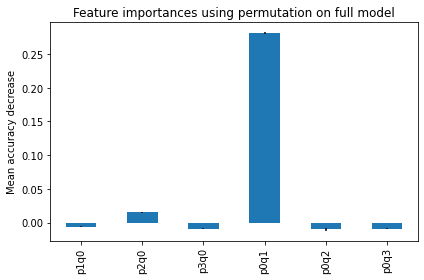

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

**ADDING INFORMATION ABOUT STATION AND TRAIN**

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numeric_features = ["p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

categorical_features = ["train", "station", "hour"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

**GRID SEARCH WITH ALL FEATURES**

In [ ]:
x_train_sub = x_train[["day","hour","train","station","p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]
x_test_sub =   x_test[["day","hour","train","station","p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]

pipe = Pipeline([("preprocessor", preprocessor), ('regression', RandomForestRegressor(random_state=1))])


param_grid = {
    "regression__n_estimators": [150, 200, 250],
    "regression__max_depth": [20,30,45, None],
}

search = GridSearchCV(pipe, param_grid, n_jobs=2, scoring='neg_mean_absolute_error',verbose=2,cv=3)
search.fit(x_train_sub, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['p1q0',
                                                                          'p2q0',
                                                                          'p3q0',
                                                                          'p0q1',
                                                                          'p0q2',
                                                                          'p0q3']),
                                                                        ('cat',
                                                            

In [ ]:
print(search.best_score_)
print(search.best_params_)

-0.011113906299592637
{'regression__max_depth': 30, 'regression__n_estimators': 250}


**RANDOM FOREST REGRESSOR WITH ALL FEATURES**

In [11]:
x_train_sub = x_train[["day","hour","train","station","p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]
x_test_sub =   x_test[["day","hour","train","station","p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]

pipe = Pipeline([("preprocessor", preprocessor), ('regression', RandomForestRegressor(n_estimators = 250,max_depth=30, random_state=1))])

pipe.fit(x_train_sub, y_train)

y_pred = pipe.predict(x_train_sub)
mae_train = mean_absolute_error(y_pred, y_train)

y_pred = pipe.predict(x_test_sub)
mae_test = mean_absolute_error(y_pred, y_test)


print("r2: ", pipe.score(x_test_sub, y_test))

print("mae train: ", mae_train)
print("mae test: ", mae_test)

r2:  0.9864449174975766
mae train:  0.0040008319215548115
mae test:  0.010371299211588744


In [ ]:
# Max number of tree for max_depth=auto
max([estimator.get_depth() for estimator in pipe['regression'].estimators_])

47

**FEATURE IMPORTANCE**

In [ ]:
from sklearn.inspection import permutation_importance
import time

forest = pipe['regression']

start_time = time.time()
result = permutation_importance(
    pipe, x_test_sub, y_test, n_repeats=10, random_state=1, n_jobs=2
)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=x_test_sub.columns)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Elapsed time to compute the importances: 61.233 seconds


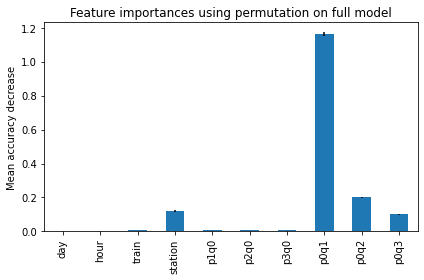

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

**BENCHMARK SUBMISSION TEST**

In [ ]:
# Read full dataset
test_ = pd.read_csv('/content/drive/Othercomputers/My Laptop/github-repositories/snfc-crowd-forecasting/data/Xtest.csv')

In [ ]:
# Adding day name column
test_['day'] = pd.to_datetime(test_['date']).dt.day_name()
test_.drop(columns=['composition','way','date'],inplace=True)
test_['hour'] = test_.hour.fillna('07:00:00')
test_['p1q0'] = test_['p1q0'].fillna(0)
test_['p2q0'] = test_['p2q0'].fillna(0)
test_['p3q0'] = test_['p3q0'].fillna(0)
test_['p0q1'] = test_['p0q1'].fillna(0)
test_['p0q2'] = test_['p0q2'].fillna(0)
test_['p0q3'] = test_['p0q3'].fillna(0)

In [ ]:
test_ = test_[["day","hour","train","station","p1q0","p2q0","p3q0","p0q1","p0q2","p0q3"]]

In [ ]:
y_pred = pipe.predict(test_)

In [ ]:
y_pred.shape

(13752,)

In [ ]:
df_result = pd.DataFrame(data = y_pred, columns = ["p0q0"])
df_result.reset_index(inplace=True)
df_result = df_result.rename(columns={"index": "ind"})
df_result.ind += 1 
df_result.head(5)
df_result['ind'] = df_result['ind'].apply(lambda x: "\"" + str(x) + "\"")
df_result.to_csv("result.csv",index=False)